In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import *
from pandas import DataFrame, Series

plt.style.use('seaborn')
sns.set(font_scale=2.5) 


In [2]:
#캐글사이트(https://www.kaggle.com/c/titanic/data)에서 데이터 파일을 다운로드 받은 경로에 맞게 설정하여 데이터 로드.
df_train = pd.read_csv('C:/Users/sangy/OneDrive - 성균관대학교/1-1 도전학기/머신러닝과 딥러닝/강의 자료/실습자료(4_6장)/4장/train.csv')
df_test = pd.read_csv('C:/Users/sangy/OneDrive - 성균관대학교/1-1 도전학기/머신러닝과 딥러닝/강의 자료/실습자료(4_6장)/4장/test.csv')

In [3]:
#학습데이터, 테스트데이터의 차원 조회 (테스트데이터에는 'survived' 칼럼이 없음)
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [4]:
columns=df_train.columns
columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df_train['Survived'].value_counts() #target value로 사용할 컬럼인 'Survived'의 클래스 별 데이터 수

0    549
1    342
Name: Survived, dtype: int64

C:\Users\sangy\anaconda3\envs\machinelearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


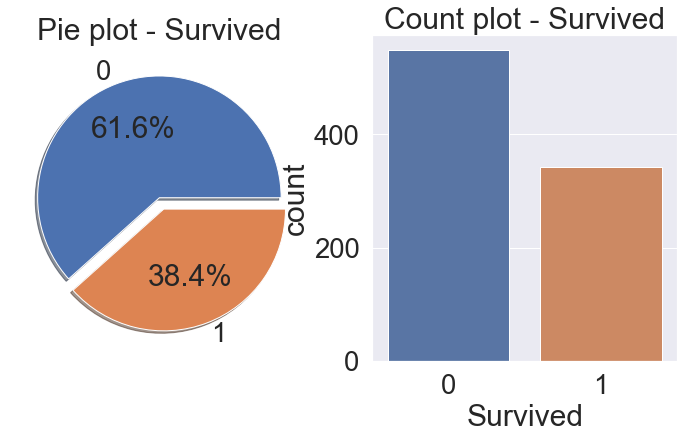

In [9]:
#'Survived' 컬럼 시각화
f, ax = plt.subplots(1, 2, figsize =(12, 6))
df_train["Survived"].value_counts().plot.pie(explode=[0,0.1], autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title("Pie plot - Survived")
ax[0].set_ylabel('')
sns.countplot("Survived", data=df_train, ax=ax[1])
ax[1].set_title("Count plot - Survived")

plt.show()

In [10]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
#이번 실습에서 학습에 사용하지 않을 컬럼 제거
train = df_train.drop(['Cabin', 'Embarked', 'Name', 'Ticket', 'PassengerId'],axis=1)
test = df_test.drop(['Cabin', 'Embarked', 'Name', 'Ticket'],axis=1)

#결측치를 평균값으로 대체
train["Age"].fillna(train.groupby("Sex")["Age"].transform("mean"), inplace=True)
test["Age"].fillna(test.groupby("Sex")["Age"].transform("mean"), inplace=True)
test["Fare"].fillna(test.groupby("Sex")["Fare"].transform("median"), inplace=True)

In [13]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [14]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [16]:
#문자열로 이루어진 'sex' 컬럼은 숫자로 매핑
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

#'Age', 'Fare' 컬럼에 대하여 평균으로부터 3시그마 안에 포함되지 않는 값들은 이상치로 판단하여 모두 제거
age_mean = train['Age'].mean()
age_std = train['Age'].std()
indexNames = train[train['Age'] < age_mean - 3*age_std].index
train.drop(indexNames , inplace=True)
indexNames = train[train['Age'] > age_mean + 3*age_std].index
train.drop(indexNames , inplace=True)
fare_mean = train['Fare'].mean()
fare_std = train['Fare'].std()
indexNames = train[train['Fare'] < fare_mean - 3*fare_std].index
train.drop(indexNames , inplace=True)
indexNames = train[train['Fare'] > fare_mean + 3*fare_std].index
train.drop(indexNames , inplace=True)